# Human Brain samples - MS Nature 2019 Rowitch dataset reprocessed

## Please download the input data before proceed
Please extract the tarball to current working directory, input data would be in **./data**

**Download link https://bit.ly/2F6o5n7**

In [ ]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import glob

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

from scipy.sparse.csc import csc_matrix

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

results_file = './write/ms_nature_2019_rowitch_pp.h5ad'

scanpy==1.5.1 anndata==0.7.1 umap==0.4.3 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


## Load human brain snRNAseq samples
Here we load the pre-processed datasets (which has been annotated), and the raw matrices (which won't be filtered on the gene level). 

### Raw data

In [3]:
wpath = "./data/"
metafile = "all_samples.txt"
meta = pd.read_csv( wpath + "/" + metafile, header = 0)

In [4]:
meta
# design

,library_id
0,C1_10x_3PEE_ref
1,C2_10x_3PEE_ref
2,C3_10x_3PEE_ref
3,C4_10x_3PEE_ref
4,C5_10x_3PEE_ref
5,C6_10x_3PEE_ref
6,C7_10x_3PEE_ref
7,C8_10x_3PEE_ref
8,C9_10x_3PEE_ref
9,MS10_10x_3PEE_ref


In [5]:
# Set up data loading
file_base = './data/'

In [6]:
adatas_raw = []
# Loop to load data
for i in range(len(meta['library_id'])):
    #Parse filenames
    sample = meta['library_id'][i]
    h5_file = file_base+sample+'/outs/filtered_feature_bc_matrix.h5'
    #Load data
    adata_tmp = sc.read_10x_h5(h5_file)
    adata_tmp.X = csc_matrix(adata_tmp.X)
    
    #Annotate data
    sampleID = sample.split('-rxn')[0]
    adata_tmp.obs['sample'] = ['MSsnRNAseq2019_'+sample]*adata_tmp.n_obs
#     adata_tmp.obs['study'] = ['MS_Nature_2019_Rowitch_snRNAseq']*adata_tmp.n_obs
#     adata_tmp.obs['chemistry'] = ['v2_10X']*adata_tmp.n_obs
#     adata_tmp.obs['tissue'] = ['Brain']*adata_tmp.n_obs
#     adata_tmp.obs['species'] = ['Human']*adata_tmp.n_obs
#     adata_tmp.obs['data_type'] = ['UMI']*adata_tmp.n_obs
#     adata_tmp.obs
    
    adata_tmp.var_names_make_unique()
    
    #Append to main adata object
    adatas_raw.append(adata_tmp)


reading ./data/C1_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C2_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C3_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C4_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C5_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C6_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C7_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C8_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/C9_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS10_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS1_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS11_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS12_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS2_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS3_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS4_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS5_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS6_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS7_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS8_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./data/MS9_10x_3PEE_ref/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
meta['sample_id'] = meta['library_id'].copy()
meta['sample_id'] = meta['sample_id'].str.replace("_3PEE_ref", "")
meta

,library_id,sample_id
0,C1_10x_3PEE_ref,C1_10x
1,C2_10x_3PEE_ref,C2_10x
2,C3_10x_3PEE_ref,C3_10x
3,C4_10x_3PEE_ref,C4_10x
4,C5_10x_3PEE_ref,C5_10x
5,C6_10x_3PEE_ref,C6_10x
6,C7_10x_3PEE_ref,C7_10x
7,C8_10x_3PEE_ref,C8_10x
8,C9_10x_3PEE_ref,C9_10x
9,MS10_10x_3PEE_ref,MS10_10x


In [8]:
meta.shape

(21, 2)

In [9]:
# Concatenate to unique adata object
adata_raw = adatas_raw[0].concatenate(adatas_raw[1:], batch_key='sample_ID', 
                                               batch_categories=meta['sample_id'])

In [10]:
adata_raw.obs['sample'] = adata_raw.obs['sample'].str.replace("_3PEE_ref", "")
adata_raw.obs.head()

,sample,sample_ID
AAACCTGTCAGTTGAC-1-C1_10x,MSsnRNAseq2019_C1_10x,C1_10x
AAACGGGAGACAAGCC-1-C1_10x,MSsnRNAseq2019_C1_10x,C1_10x
AAACGGGCAAATTGCC-1-C1_10x,MSsnRNAseq2019_C1_10x,C1_10x
AAACGGGCACGAGAGT-1-C1_10x,MSsnRNAseq2019_C1_10x,C1_10x
AAACGGGTCAACTCTT-1-C1_10x,MSsnRNAseq2019_C1_10x,C1_10x


In [11]:
adata_raw.obs.drop(columns=['sample_ID'], inplace=True)
adata_raw.obs.head()

,sample
AAACCTGTCAGTTGAC-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGAGACAAGCC-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGCAAATTGCC-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGCACGAGAGT-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGTCAACTCTT-1-C1_10x,MSsnRNAseq2019_C1_10x


In [12]:
adata_raw.obs.index.rename('barcode', inplace=True)
adata_raw.obs.head()

,sample
barcode,
AAACCTGTCAGTTGAC-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGAGACAAGCC-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGCAAATTGCC-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGCACGAGAGT-1-C1_10x,MSsnRNAseq2019_C1_10x
AAACGGGTCAACTCTT-1-C1_10x,MSsnRNAseq2019_C1_10x


In [13]:
adata_raw.shape

(65118, 33538)

In [14]:
type(adata_raw.X)
# adata_raw.X = csc_matrix(adata_raw.X)

scipy.sparse.csr.csr_matrix

In [15]:
# Save merged object
adata_raw.write(results_file)

... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


# 1. Pre-processing and visualization

## 1.1 Quality control

In [16]:
adata_raw_copy = adata_raw.copy()
sc.pp.calculate_qc_metrics(adata_raw, inplace=True)

In [17]:
# Quality control - calculate QC covariates
adata_raw.obs['n_counts'] = adata_raw.X.sum(1)
adata_raw.obs['log_counts'] = np.log(adata_raw.obs['n_counts'])
adata_raw.obs['n_genes'] = (adata_raw.X > 0).sum(1)

In [18]:
# mt_gene_mask = [gene.startswith('MT-') for gene in adata_raw.var_names]
# adata_raw.obs['mt_frac'] = adata_raw.X[:, mt_gene_mask].sum(1)/adata_raw.obs['n_counts']
mito_genes = adata_raw.var_names.str.startswith('MT-')
adata_raw.obs['mt_frac'] = np.sum(adata_raw[:, mito_genes].X, axis=1) / np.sum(adata_raw.X, axis=1)

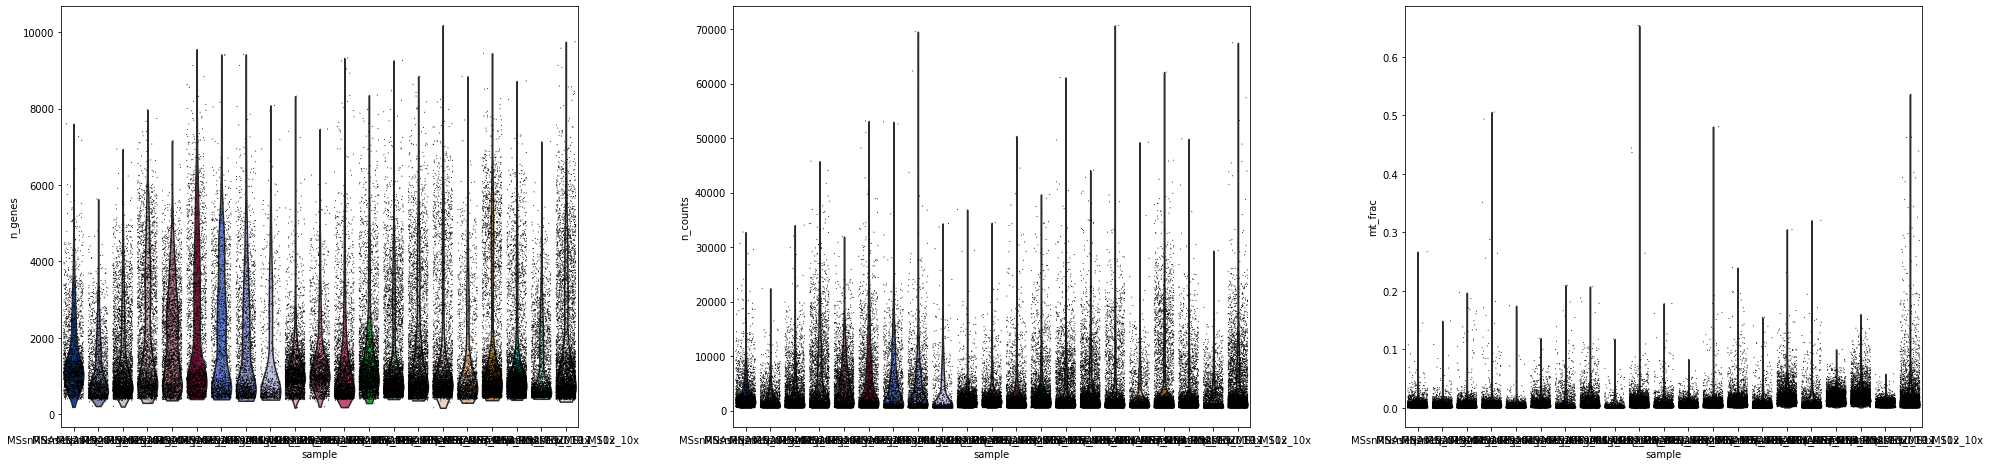

In [19]:
# Quality control - plot QC metrics
sc.pl.violin(adata_raw, ['n_genes', 'n_counts', 'mt_frac'],groupby='sample',
             jitter=0.4, multi_panel=False)

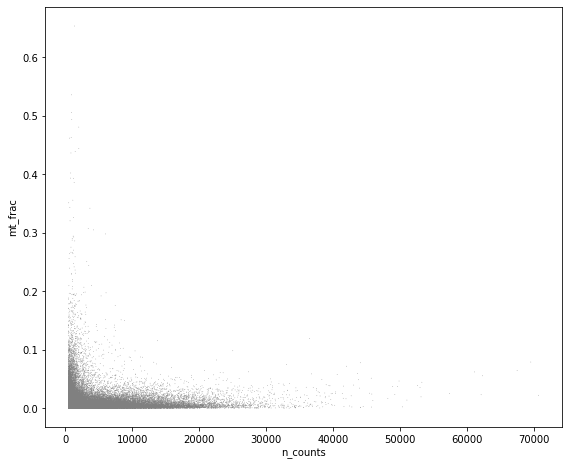

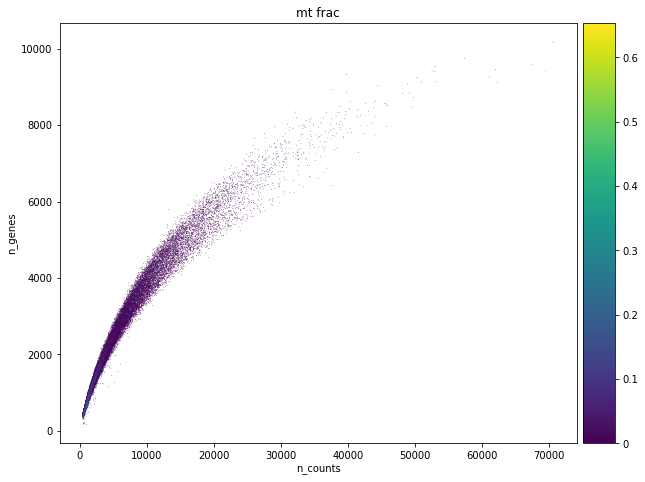

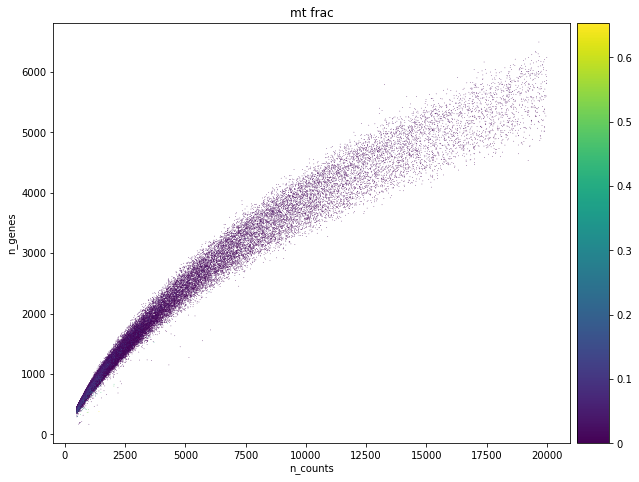

In [20]:
sc.pl.scatter(adata_raw, x='n_counts', y='mt_frac')
sc.pl.scatter(adata_raw, x='n_counts', y='n_genes', color='mt_frac')
sc.pl.scatter(adata_raw[adata_raw.obs['n_counts'] < 20000], x='n_counts', y='n_genes', color='mt_frac')

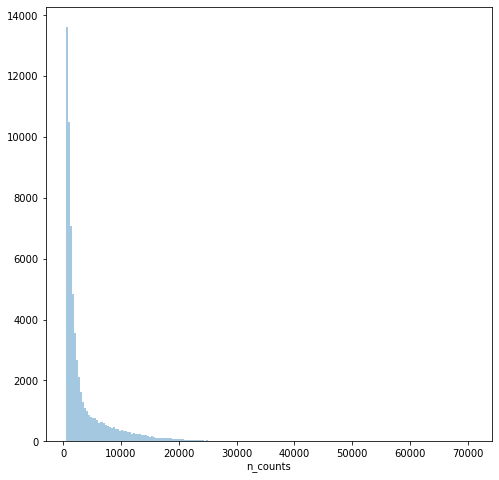

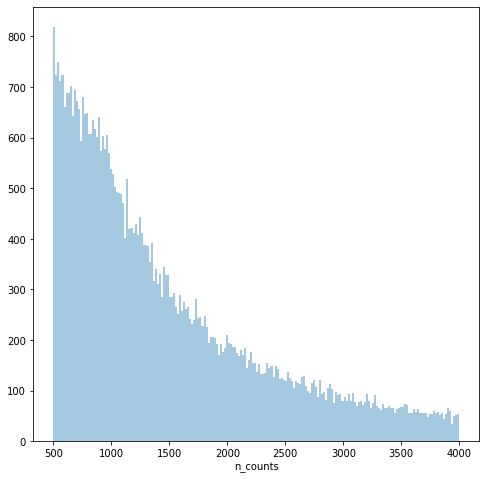

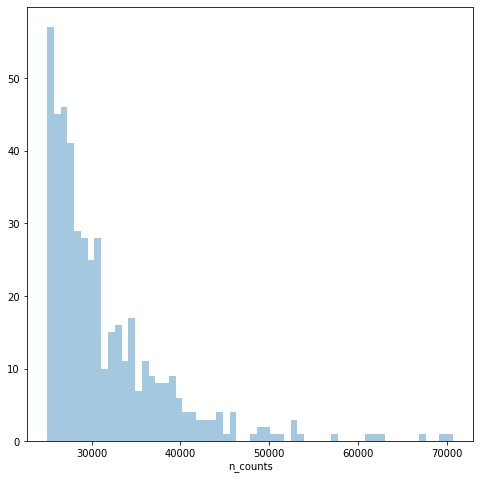

In [21]:
#Thresholding decision: counts
p3 = sb.distplot(adata_raw.obs['n_counts'], kde=False, bins=200)
plt.show()

p4 = sb.distplot(adata_raw.obs['n_counts'][adata_raw.obs['n_counts']<4000], kde=False,bins=200)
plt.show()

p5 = sb.distplot(adata_raw.obs['n_counts'][adata_raw.obs['n_counts']>25000], kde=False, bins=60)
plt.show()

Zoom-in histograms of the number of counts per cell show that there's a group of cells with n_counts < 3500, this would remove 47k out of 65k cells. But paper said cut at 1000 reads, stick with 1000 reads. On the upper end of the distribution, we can see that the high peak centered around 5000 counts spans until around 40000 counts.

In [22]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata_raw.n_obs))

sc.pp.filter_cells(adata_raw, min_counts = 1000)
print('Number of cells after min count filter: {:d}'.format(adata_raw.n_obs))

sc.pp.filter_cells(adata_raw, max_counts = 40000)
print('Number of cells after max count filter: {:d}'.format(adata_raw.n_obs))

adata_raw = adata_raw[adata_raw.obs['mt_frac'] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata_raw.n_obs))


Total number of cells: 65118
filtered out 18645 cells that have less than 1000 counts
Number of cells after min count filter: 46473
filtered out 44 cells that have more than 40000 counts
Number of cells after max count filter: 46429
Number of cells after MT filter: 46396


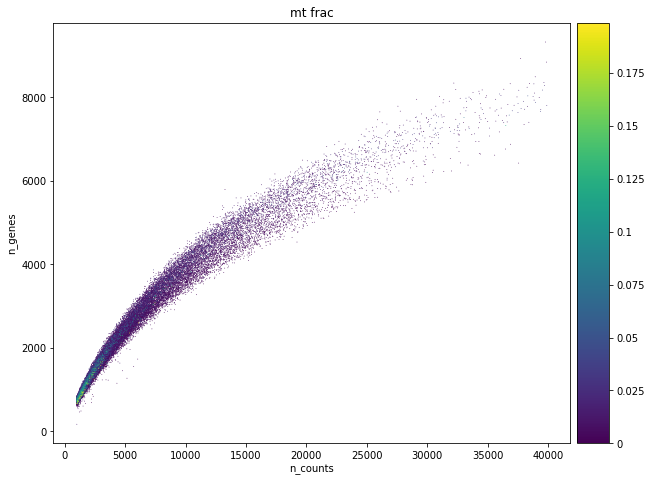

In [23]:
# look at the effect of thresholding
sc.pl.scatter(adata_raw, x='n_counts', y='n_genes', color='mt_frac')

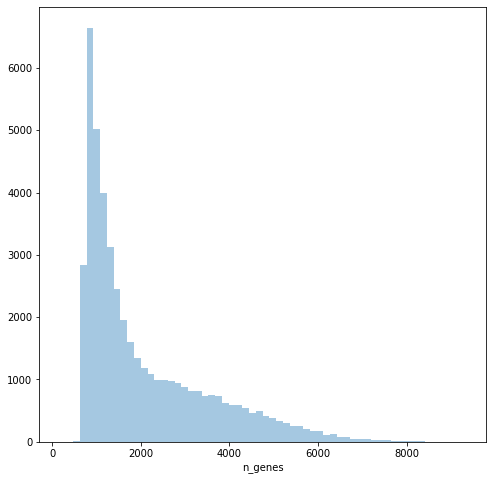

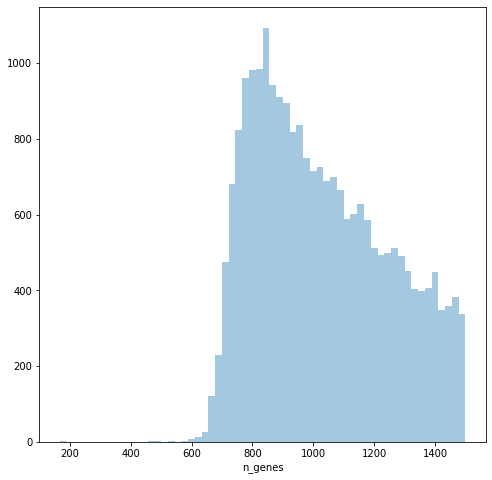

In [24]:
#Thresholding decision: genes
p6 = sb.distplot(adata_raw.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata_raw.obs['n_genes'][adata_raw.obs['n_genes']<1500], kde=False, bins=60)
plt.show()



From the histograms of the number of genes per cell, we can notice that there still is a small population showing n_genes < 600 which should be filtered out. But paper said 500

In [25]:
# Thresholding on number of genes
print('Total number of cells: {:d}'.format(adata_raw.n_obs))

sc.pp.filter_cells(adata_raw, min_genes = 600)
print('Number of cells after gene filter: {:d}'.format(adata_raw.n_obs))

Total number of cells: 46396
filtered out 6 cells that have less than 600 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 46390


In [26]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_raw.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_raw, min_cells=20)
print('Number of genes after cell filter: {:d}'.format(adata_raw.n_vars))

Total number of genes: 33538
filtered out 8473 genes that are detected in less than 20 cells
Number of genes after cell filter: 25065


In [27]:
# Save merged object
adata_raw.write('./write/ms_nature_2019_rowitch_done_QC_filter_46kcell_25kgene.h5ad')

### Normalization

In [28]:
adata_raw = sc.read_h5ad('./write/ms_nature_2019_rowitch_done_QC_filter_46kcell_25kgene.h5ad')
sc.pp.normalize_per_cell(adata_raw, counts_per_cell_after=1e6)
sc.pp.log1p(adata_raw)
# sc.pp.pca(adata_pp, n_comps=15, svd_solver='arpack')
# sc.pp.neighbors(adata_pp)
# sc.tl.louvain(adata_pp, key_added='groups', resolution=0.5)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [29]:
adata_raw.write('./write/ms_nature_2019_rowitch_filtered_normalized_log1p_non_scaled.h5ad')

In [30]:
import gc
gc.collect()

5062

In [31]:
infile = './write/ms_nature_2019_rowitch_filtered_normalized_log1p_non_scaled.h5ad'
adata_raw = sc.read_h5ad(infile)

In [32]:
def mod_index(meta):
    meta['index'] = meta['index'].str.replace("_3PEE_ref", "")    
    return meta


In [ ]:
# attach exisiting harmony and liger coordinates

# harmony
adata_harmony = sc.read_h5ad("./data/harmony_clustered.h5ad")
adata_harmony.obs.index = adata_harmony.obs.index.str.replace("_3PEE_ref", "")
adata_harmony.obs

# subset adata_raw to match same cells
cells = list(set(adata_raw.obs.index) & set(adata_harmony.obs.index))
adata_raw = adata_raw[cells]

xpca = pd.DataFrame(adata_harmony.obsm['X_pca']).set_index(adata_harmony.obs.index)
xtsne = pd.DataFrame(adata_harmony.obsm['X_tsne']).set_index(adata_harmony.obs.index)
xumap = pd.DataFrame(adata_harmony.obsm['X_umap']).set_index(adata_harmony.obs.index)

adata_raw.obsm['X_pca_harmony'] = np.array(xpca.loc[adata_raw.obs.index])
adata_raw.obsm['X_tsne_harmony'] = np.array(xtsne.loc[adata_raw.obs.index])
adata_raw.obsm['X_umap_harmony'] = np.array(xumap.loc[adata_raw.obs.index])

adata_raw.obs['louvain_harmony'] = adata_harmony.obs['louvain'].loc[adata_raw.obs.index]


In [34]:
adata_raw.obs = adata_raw.obs.astype({'louvain_harmony':'category'})

In [35]:
# liger
xtsne = pd.read_csv("./data/liger_runumap.tsne.coords.txt", sep='\t', encoding='utf-8')
xumap = pd.read_csv("./data/liger_runumap.umap.coords.txt", sep='\t', encoding='utf-8')
xlouvain = pd.read_csv("./data/liger_clusterID.txt", sep='\t', encoding='utf-8')

xtsne = mod_index(xtsne)
xumap = mod_index(xumap)
xlouvain['index'] = xlouvain['barcode']
xlouvain = mod_index(xlouvain)

xumap.set_index('index', inplace=True)
xtsne.set_index('index', inplace=True)
xlouvain.set_index('index', inplace=True)

In [36]:
adata_raw.obsm['X_tsne_liger'] = np.array(xtsne.loc[adata_raw.obs.index])
adata_raw.obsm['X_umap_liger'] = np.array(xumap.loc[adata_raw.obs.index])
adata_raw.obs['louvain_liger'] = np.array(xlouvain.loc[adata_raw.obs.index]['clusterID'])

adata_raw.obs = adata_raw.obs.astype({'louvain_liger':'category'})



In [37]:
outfile = infile
outfile = outfile.replace(".h5ad","")
adata_raw.write_h5ad(outfile+"_with_embedings.h5ad")

In [38]:
import gc
gc.collect()

350

# attach meta data from the paper

In [39]:
xmeta = pd.read_csv("./data/meta.tsv", sep='\t', encoding='utf-8')

In [40]:
xmeta.index = xmeta['cell'].str.replace("_.*_.*","")+"-"+xmeta['sample']+"_10x"

In [41]:
xmeta

,cell,cell_type,sample,diagnosis,stage,age,sex,region,Capbatch,Seqbatch,RIN,PMI,genes,UMIs,mito_perc,ribo_perc,DMGM_UL,DMGM_DL,DMWM,pseudotime
AAACCTGGTCCATGAT-1-C8_10x,AAACCTGGTCCATGAT-1_5981_BA9,EN-L5-6,C8,Control,Control,44,female,prefrontal,CAP7,SEQ5,7.8,19,3674,9333,0.005143,0.002357,NaN,NaN,NaN,NaN
AAACGGGAGTAGCCGA-1-C8_10x,AAACGGGAGTAGCCGA-1_5981_BA9,EN-L2-3,C8,Control,Control,44,female,prefrontal,CAP7,SEQ5,7.8,19,2407,4853,0.004945,0.003709,NaN,NaN,NaN,1.555339
AAACGGGCATCGGTTA-1-C8_10x,AAACGGGCATCGGTTA-1_5981_BA9,IN-PVALB,C8,Control,Control,44,female,prefrontal,CAP7,SEQ5,7.8,19,3593,7668,0.018519,0.006129,NaN,NaN,NaN,NaN
AAACGGGTCCATGAAC-1-C8_10x,AAACGGGTCCATGAAC-1_5981_BA9,EN-L4,C8,Control,Control,44,female,prefrontal,CAP7,SEQ5,7.8,19,3288,6940,0.016427,0.007061,NaN,NaN,NaN,NaN
AAAGATGCACGACTCG-1-C8_10x,AAAGATGCACGACTCG-1_5981_BA9,EN-L5-6,C8,Control,Control,44,female,prefrontal,CAP7,SEQ5,7.8,19,4161,10297,0.007672,0.003108,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTAAGA-1-MS12_10x,TTTGTCAGTGTTAAGA-1_MS200_A303,OL,MS12,MS,Chronic inactive,44,female,prefrontal,CAP6,SEQ4,9.0,20,857,1227,0.003260,0.011410,41.0,6.0,12.0,NaN
TTTGTCAGTTCGCGAC-1-MS12_10x,TTTGTCAGTTCGCGAC-1_MS200_A303,EN-L4,MS12,MS,Chronic inactive,44,female,prefrontal,CAP6,SEQ4,9.0,20,5463,14703,0.010610,0.018160,41.0,6.0,12.0,NaN
TTTGTCAGTTCTGGTA-1-MS12_10x,TTTGTCAGTTCTGGTA-1_MS200_A303,Astrocytes,MS12,MS,Chronic inactive,44,female,prefrontal,CAP6,SEQ4,9.0,20,1560,2548,0.018838,0.003925,41.0,6.0,12.0,NaN
TTTGTCATCCAAATGC-1-MS12_10x,TTTGTCATCCAAATGC-1_MS200_A303,EN-PYR,MS12,MS,Chronic inactive,44,female,prefrontal,CAP6,SEQ4,9.0,20,814,1066,0.051595,0.019700,41.0,6.0,12.0,NaN


In [42]:
xmeta.loc[set(set(xmeta.index) & set(adata_raw.obs.index))][['Capbatch','Seqbatch','cell_type','diagnosis','region','sample','sex','stage']]

,Capbatch,Seqbatch,cell_type,diagnosis,region,sample,sex,stage
CTGTTTAGTGACTCAT-1-MS7_10x,CAP4,SEQ2,EN-MIX,MS,prefrontal,MS7,male,Acute/Chronic active
TCATTACAGTAACCCT-1-MS12_10x,CAP6,SEQ4,EN-L4,MS,prefrontal,MS12,female,Chronic inactive
GTGTTAGGTAAGTAGT-1-MS5_10x,CAP4,SEQ2,OL,MS,parietal,MS5,female,Acute/Chronic active
CGCTGGAAGCAGACTG-1-C3_10x,CAP1,SEQ1,OL,Control,motor-premotor,C3,male,Control
CTCTACGGTAGCGTCC-1-MS9_10x,CAP3,SEQ2,Astrocytes,MS,temporal,MS9,male,Chronic inactive
...,...,...,...,...,...,...,...,...
GCGCCAAGTACGAAAT-1-MS4_10x,CAP2,SEQ1,OL,MS,temporal,MS4,female,Acute/Chronic active
GTCGGGTTCTGAGGGA-1-MS7_10x,CAP4,SEQ2,Astrocytes,MS,prefrontal,MS7,male,Acute/Chronic active
CACCAGGGTTTGACTG-1-MS9_10x,CAP3,SEQ2,EN-L2-3,MS,temporal,MS9,male,Chronic inactive
CGATGTATCACTATTC-1-MS2_10x,CAP1,SEQ1,Astrocytes,MS,motor-premotor,MS2,female,Acute/Chronic active


In [ ]:
features = ['Capbatch','Seqbatch','cell_type','diagnosis','region','sample','sex','stage']
bcodes = set(set(xmeta.index) & set(adata_raw.obs.index))
for f in features:
    adata_raw.obs[f] = 'nan'
    adata_raw.obs[f].loc[bcodes] = xmeta[f].loc[bcodes]


In [44]:
set(adata_raw.obs['cell_type'])

{'Astrocytes',
 'B cells',
 'EN-L2-3',
 'EN-L4',
 'EN-L5-6',
 'EN-MIX',
 'EN-PYR',
 'Endo cells',
 'Glia-MIX',
 'IN-PVALB',
 'IN-SST',
 'IN-SV2C',
 'IN-VIP',
 'Microglia',
 'OL',
 'OPC',
 'Phagocytes',
 'Stromal cells',
 'T cells',
 'nan'}

In [45]:
adata_raw.obs['>Description'] = ['Human brain snRNAseq 46k cells (MS Nature 2019 Schirmer et al.); data - normalized, log transformed UMI; platform - 10X v2 chemistry | embedding by umap_harmony; color by cell_type']*adata_raw.n_obs

In [46]:
outfile = infile
outfile = outfile.replace(".h5ad","")
adata_raw.write_h5ad(outfile+"_with_embedings_and_labels.h5ad")

... storing 'sample' as categorical
... storing 'Capbatch' as categorical
... storing 'Seqbatch' as categorical
... storing 'cell_type' as categorical
... storing 'diagnosis' as categorical
... storing 'region' as categorical
... storing 'sex' as categorical
... storing 'stage' as categorical
... storing '>Description' as categorical
